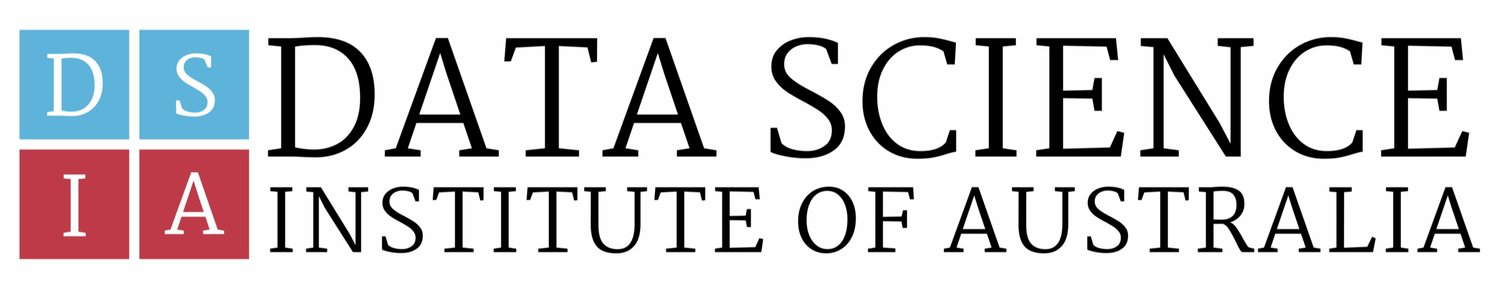

# Data Science and AI
## Lab 3.1.2: Exploring Data

## Part 1: Continuous and Categorical Data

When we explore a dataset we usually produce textual and graphical output together, starting with a high-level overview of the data and gradually drilling down into the individual features and relationships between them. 

Our most important libraries for this task are:

In [4]:
from math import floor
from math import ceil
import numpy as np
import pandas as pd

In [5]:
# Cause plots to be displayed in the notebook:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import use
import seaborn as sns

In [6]:
# Override default figure sizing:
plt.rcParams['figure.figsize'] = (10, 6)
sns.set(color_codes = True)
plt_backend = plt.get_backend()

## Data Profiling
We actually start profiling the data when we first load it and check for input errors, as in the last lab. Once we have a DataFrame we can work with, however, things start getting more interesting.
- Load the file `bikeshare.csv` into a DataFrame named `bikes`, and check that it was loaded properly:

In [11]:
# insert code here
bikes = pd.read_csv('data/bikeshare.csv', header = 0)

We may want our program to capture particular features of the dataset into variables, but if we just want to get a feel for the data it is easier to use a higher-level Pandas method like `describe()`:
- Use `describe` to get the description of datasets.

In [8]:
# insert code here
bikes.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

### Continuous Data
We may have to do a lot of work before we can produce presentable graphics, but we can start creating simple visualisations as soon as we have a DataFrame. 

We usually start charting variables one-by-one (although when several have the same range it may be preferable to overlay them, using a different colour or symbol for each).
- Use the `scatter` method of Pandas to create a scatter plot of `windspeed`:

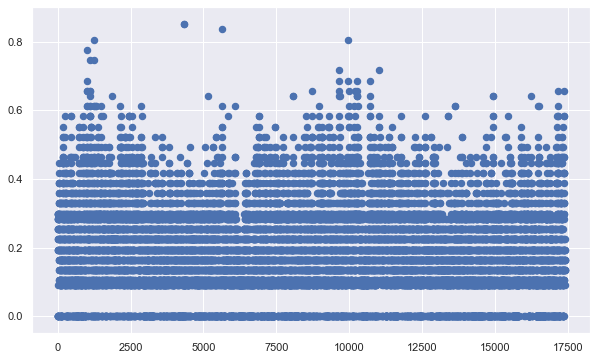

In [34]:
# insert code here
_ = plt.scatter(bikes.instant,bikes.windspeed, marker=None, linewidths=3, s=20, alpha = 1)

- The `scatter` method has varous parameters for controlling the appearance of the chart. Experiment with `s` , `linewidths`, and `alpha` below:

In [ ]:
# insert code here

The scatterplot shows us the raw data. Our next step is usually to see how it is distributed, which is what the histogram is for:
> A histogram is used for continuous data, where the bins represent ranges of data, while a bar chart is a plot of categorical variables.

- **Identify continuous variables**
- **Create histogram for those variables**

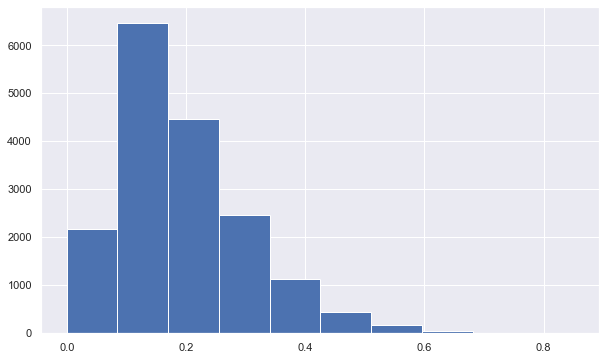

In [39]:
# insert code here continuouse variables: temp,atemp,hum,windspeed
_ = plt.hist(bikes.windspeed,bins = 10)

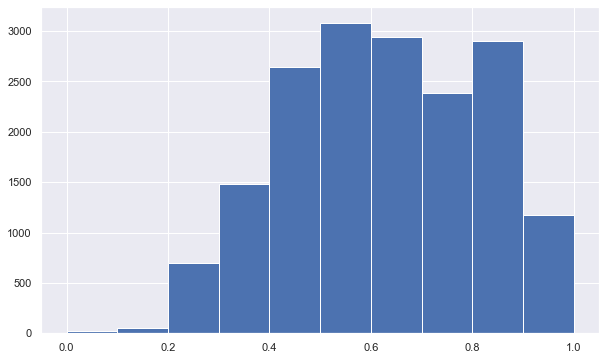

In [40]:
_ = plt.hist(bikes.hum,bins = 10)

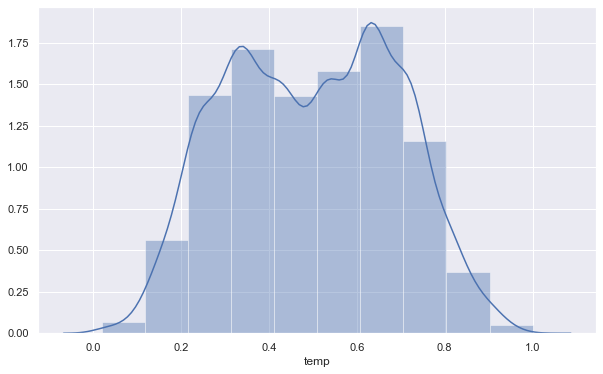

In [12]:
sns.distplot(bikes.temp, bins = 10)

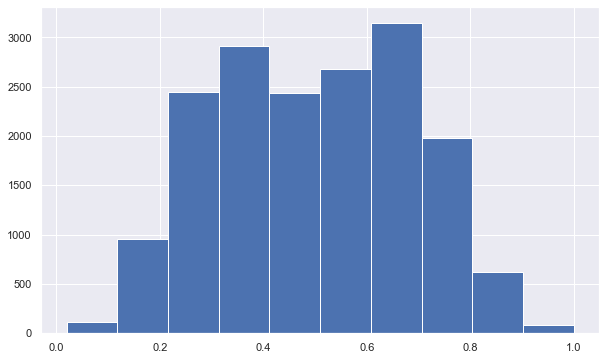

In [41]:
_ = plt.hist(bikes.temp,bins = 10)

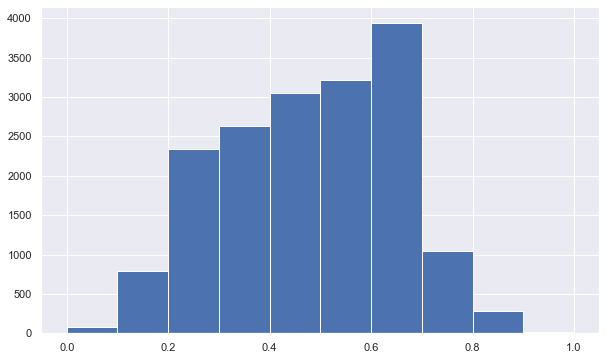

In [42]:
_ = plt.hist(bikes.atemp,bins = 10)

What do the horizontal and vertical axes represent?

**ANSWER**: ?

**NOTE**: Samples in a given bin are greater than the axis value of its left side and less than or equal to the axis value of its right side. (The left-most bin is an exception: it represents greater than or equal to.)*

The box-and-whisker plot provides a compact view of the major percentiles of the distribution:
> The box extends from the lower to
upper quartile values of the data, with a line at the median. The whiskers extend from the box to show the range of the data.  Flier points are those past the end of the whiskers.
- Make a box and whisker plot for the column ``atemp``.

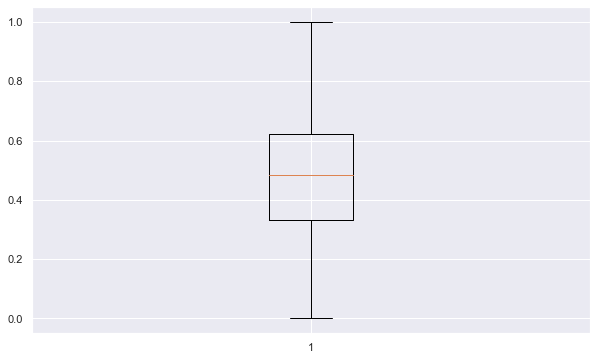

In [46]:
_ = plt.boxplot(bikes.atemp)

This kind of plot really shines when we want to show several distributions at once (as long as they have compatible ranges). Plot `atemp` and `windspeed` together:
- Plot `atemp` and `windspeed` together. Change labels accordingly.

In [141]:
#_ = plt.boxplot(bikes[['atemp', 'windspeed']])

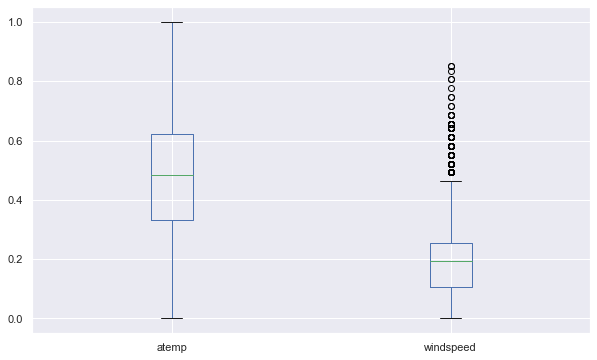

In [65]:
bikes[['atemp', 'windspeed']].plot.box()

### Classified Data

Samples may represent different classes according to one or more categorical variables. Sometimes our goal is to discover these classes, or to train a classification model from samples that have been manually classified.

Here, the famous **Iris** dataset gets loaded from the UCI repository:

In [66]:
import urllib

# get Iris dataset from UCI Machine Learning Repository:
url = 'http://goo.gl/HppjFh'
raw_data = urllib.request.urlopen(url)

# load the CSV file:
iris_data = pd.read_csv(raw_data, delimiter=',',
                        names=('sepal_length',
                               'sepal_width',
                               'petal_length',
                               'petal_width',
                               'species'))

Note that the column names were overridden by the `names` argument of the Pandas `read.csv` method. This requires prior knowledge of the dataset, which we would normally get from a data dictionary (although sometimes we just have to figure it out for ourselves).
- Print the first few rows of this DataFrame:

In [69]:
# insert code here
iris_data.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In this dataset, `species` has several possible values (representing the classes of the samples).
- Find out distinct number of `species` and number of sample for each `species` in this dataset.

In [80]:
# insert code here
iris_data.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [79]:
iris_data.groupby('species').count()

sepal_length  sepal_width  petal_length  petal_width
species                                                              
Iris-setosa                50           50            50           50
Iris-versicolor            50           50            50           50
Iris-virginica             50           50            50           50

We often need to capture the number of classes in code. We can do this with a variation on the above. Try this below:

In [ ]:
# insert code here

We often need to calculate aggregate values within subgroups of the dataset. The Pandas DataFrame method for this is `groupby`.
- Apply the `groupby` method to get `mean` of `sepal_length` and `sepal_width` for the above dataset.

In [83]:
# insert code here
iris_data.groupby(['sepal_length', 'sepal_width']).mean()

petal_length  petal_width
sepal_length sepal_width                           
4.3          3.0              1.100000     0.100000
4.4          2.9              1.400000     0.200000
             3.0              1.300000     0.200000
             3.2              1.300000     0.200000
4.5          2.3              1.300000     0.300000
4.6          3.1              1.500000     0.200000
             3.2              1.400000     0.200000
             3.4              1.400000     0.300000
             3.6              1.000000     0.200000
4.7          3.2              1.450000     0.200000
4.8          3.0              1.400000     0.200000
             3.1              1.600000     0.200000
             3.4              1.750000     0.200000
4.9          2.4              3.300000     1.000000
             2.5              4.500000     1.700000
             3.0              1.400000     0.200000
             3.1              1.500000     0.100000
5.0          2.0              3.500000     1.000000
             2.3              3.300000     1.000000
             3.0              1.600000     0.200000
             3.2              1.200000     0.200000
             3.3              1.400000     0.200000
             3.4              1.550000     0.300000
             3.5              1.450000     0.450000
             3.6              1.400000     0.200000
5.1          2.5              3.000000     1.100000
             3.3              1.700000     0.500000
             3.4              1.500000     0.200000
             3.5              1.400000     0.250000
             3.7              1.500000     0.400000
...                                ...          ...
6.4          2.9              4.300000     1.300000
             3.1              5.500000     1.800000
             3.2              4.900000     1.900000
6.5          2.8              4.600000     1.500000
             3.0              5.500000     2.000000
             3.2              5.100000     2.000000
6.6          2.9              4.600000     1.300000
             3.0              4.400000     1.400000
6.7          2.5              5.800000     1.800000
             3.0              5.100000     2.000000
             3.1              4.900000     1.766667
             3.3              5.700000     2.300000
6.8          2.8              4.800000     1.400000
             3.0              5.500000     2.100000
             3.2              5.900000     2.300000
6.9          3.1              5.133333     1.966667
             3.2              5.700000     2.300000
7.0          3.2              4.700000     1.400000
7.1          3.0              5.900000     2.100000
7.2          3.0              5.800000     1.600000
             3.2              6.000000     1.800000
             3.6              6.100000     2.500000
7.3          2.9              6.300000     1.800000
7.4          2.8              6.100000     1.900000
7.6          3.0              6.600000     2.100000
7.7          2.6              6.900000     2.300000
             2.8              6.700000     2.000000
             3.0              6.100000     2.300000
             3.8              6.700000     2.200000
7.9          3.8              6.400000     2.000000

[116 rows x 2 columns]

The Pandas `plot` method provides a quick way to produce a scatter plot:
- Draw a Scatterplot showing sepal width and length using the Pandas `plot` method.

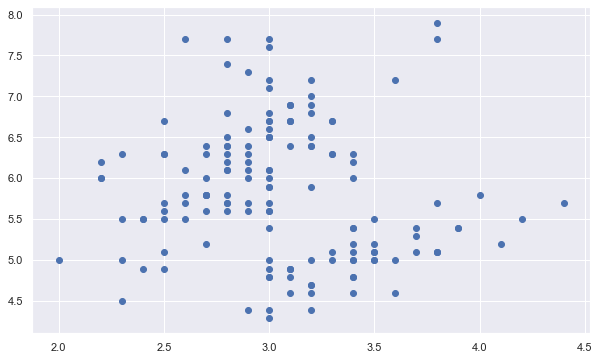

In [91]:
plt.scatter(iris_data.sepal_width,iris_data.sepal_length)

- Draw a Barplot showing sepal width and length using the Pandas plot method.

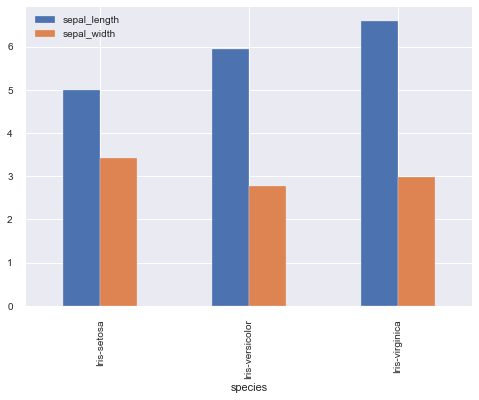

In [238]:
iris_data.groupby("species").agg({"sepal_length": 'mean','sepal_width':'mean'}).plot(kind="bar")
plt.show()

- Draw a Scatterplot showing sepal width and length using the Pandas plot method.
    - [BONUS] Set `title`, `xlabel`, `ylabel` to the plot

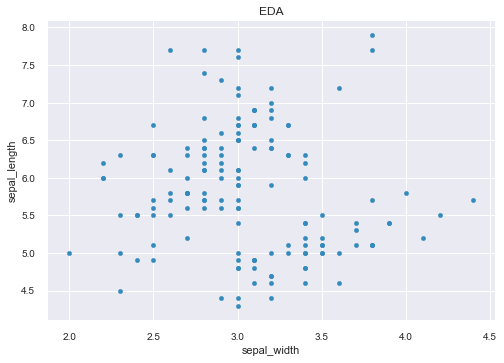

In [239]:
iris_data.plot.scatter(x="sepal_width", y="sepal_length", title = "EDA")

In this dataset we have also `petal_width`, `petal_length`. 
- Try to draw Scatterplot using these variables.

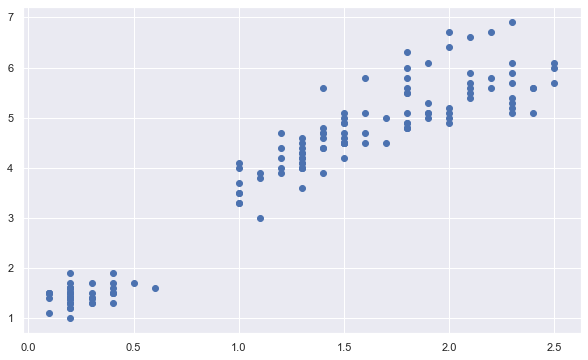

In [97]:
plt.scatter(iris_data.petal_width,iris_data.petal_length)

In this case, we already have different species, so we can colour the points accordingly. This is easy to do using the `Seaborn` library. Try using `lmplot` of seaborn library and use the parameter `hue` and `fit_reg=False`.
- Draw a Scatterplot showing sepal width and length.

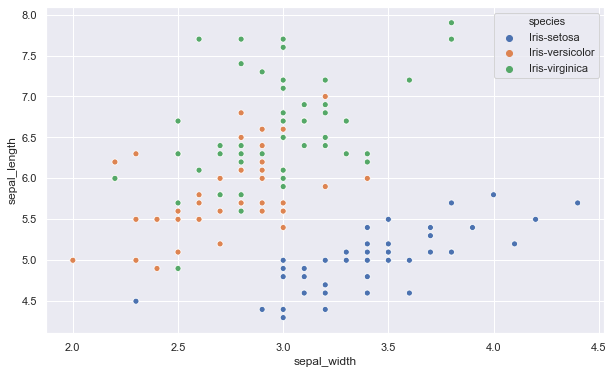

In [117]:
# insert code here
sns.scatterplot(iris_data.sepal_width,iris_data.sepal_length, hue=iris_data.species)

- [BONUS] Draw a Scatterplot showing sepal width and length. Without using seaborn.

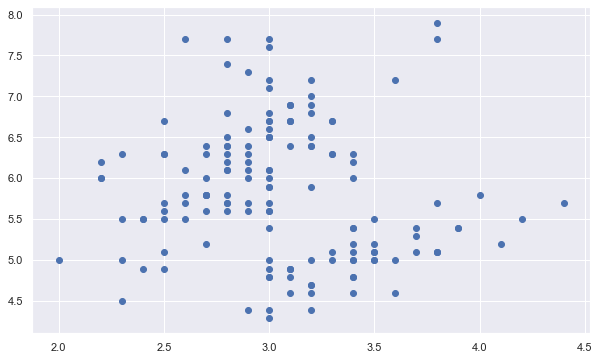

In [122]:
plt.scatter(iris_data.sepal_width,iris_data.sepal_length)

To find out why this function is called `lmplot`, try it again with `fit_reg=True`:
- Draw a Scatterplot showing sepal width and length:

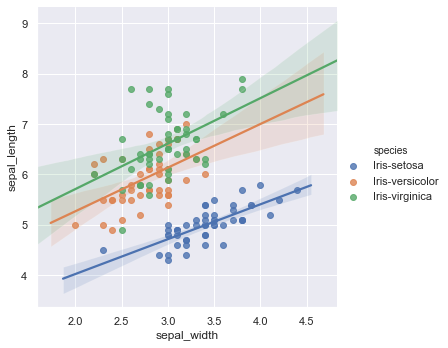

In [132]:
sns.lmplot("sepal_width","sepal_length",iris_data, hue="species")

The Seaborn `jointplot` function charts a correlation along with both distributions:
- Draw a `jointplot` showing sepal width and length:

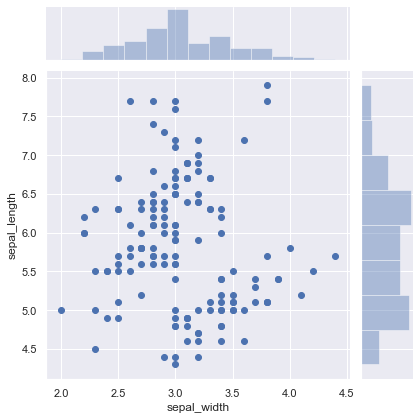

In [134]:
# insert code here
sns.jointplot("sepal_width","sepal_length",iris_data)

When we want to see all the correlations at once, we can use `pairplot`:
- Draw a `pairplot` of the dataset:

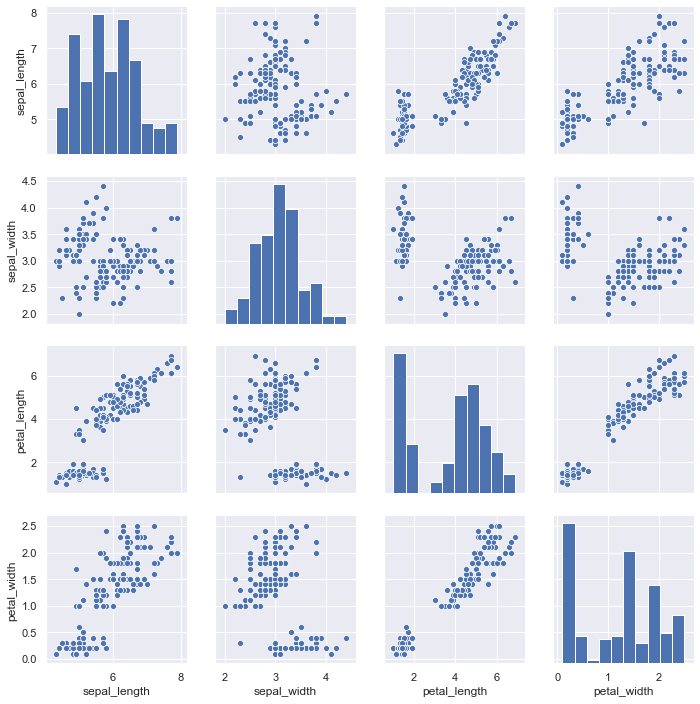

In [135]:
sns.pairplot(iris_data)

And, if the classes are known, we can apply colour using the `hue` parameter. Try this below:

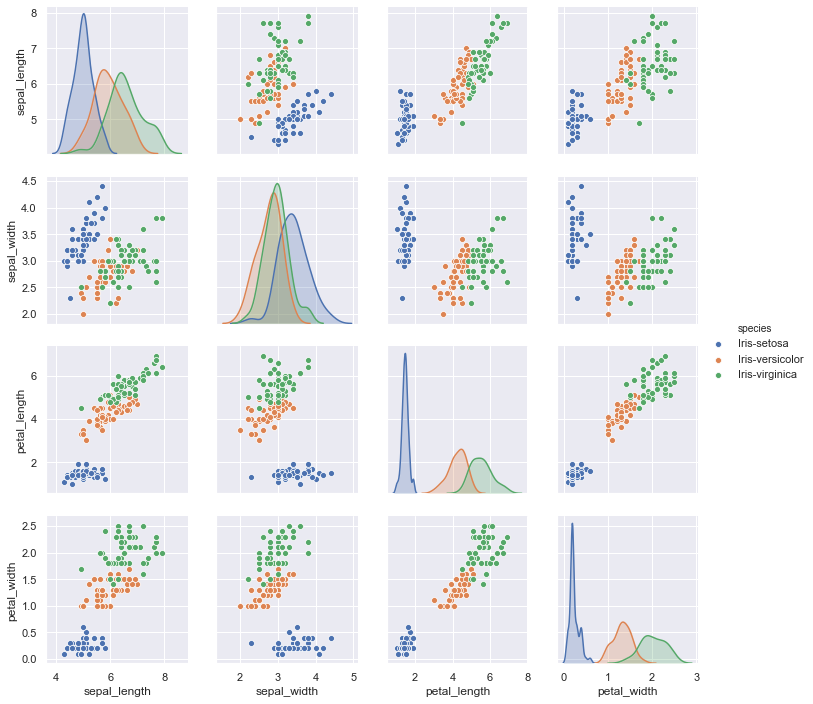

In [137]:
sns.pairplot(iris_data, hue="species")

Note that this gave us class-based distributions instead of an overall histogram, as well.

When we want to see numerical values of the correlations, the Pandas `corr` method provides a table of pair-wise correlations between the features in the DataFrame:

In [138]:
# insert code here
iris_data.corr()

sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000

### High-Level Data Profiling Libraries

We need to master the basic data profiling functions because we will by using them frequently, for exploring data and answering ad hoc questions. In a production solution, we may need to incorporate specific data profiling code into our script so that we can automate data cleaning. However, when we just want to examine the data interactively before we start modelling, it is easier to use a high-level library like the following:
- `pandas_profiling`

In [143]:
! pip install pandas_profiling

     |████████████████████████████████| 133kB 8.7MB/s eta 0:00:01
     |████████████████████████████████| 614kB 7.0MB/s eta 0:00:01
     |████████████████████████████████| 225kB 17.7MB/s eta 0:00:01    |██████████▋                     | 71kB 15.0MB/s eta 0:00:01
  Stored in directory: /Users/Liuyang/Library/Caches/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Stored in directory: /Users/Liuyang/Library/Caches/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Stored in directory: /Users/Liuyang/Library/Caches/pip/wheels/b0/b2/96/2074eee7dbf7b7df69d004c9b6ac4e32dad04fb7666cf943bd
Successfully built pandas-profiling htmlmin confuse


In [148]:
import pandas_profiling
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [149]:
df = pd.read_csv('data/Meteorite_Landings.csv',
                 parse_dates=['year'],
                 encoding='UTF-8')

In [150]:
# Note: Pandas does not support dates before 1880,
# so we ignore these for this analysis
df['year'] = pd.to_datetime(df['year'], errors='coerce')

# add some fake data to test the features of pandas_profiling.ProfileReport():
# Example: Constant variable
df['source'] = 'NASA'
# Example: Boolean variable
df['boolean'] = np.random.choice([True, False], df.shape[0])
# Example: Mixed with base types
df['mixed'] = np.random.choice([1, 'A'], df.shape[0])
# Example: Highly correlated variables
df['reclat_city'] = df['reclat'] + np.random.normal(scale=5, size=(len(df)))
# Example: Duplicate observations ...
duplicates_to_add = pd.DataFrame(df.iloc[0:10])
duplicates_to_add['name'] = duplicates_to_add['name'] + ' copy'
df = df.append(duplicates_to_add, ignore_index=True)

Use `ProfileReport` of `pandas_profiling` to get the overview of the dataset.

In [151]:
# run the report:
pandas_profiling.ProfileReport(df)

For **HOMEWORK**: check out the `pydqc` library.

In [ ]:
# reset matplotlib backend
use(plt_backend)

## Part 2: Temporal and Geospatial Data

## Time Series

A time series is basically a series or a data frame with a time-based index column. Working with time series introduces a lot of challenges and possibilities, but most tasks are catered for by the standard libraries in Python.

Here is a history of air passenger counts by month, loaded into an ordinary DataFrame:

In [153]:
airpass = pd.read_csv('data/AirPassengers.csv')
airpass.head()

TravelDate  Passengers
0   1/1/1949         112
1   2/1/1949         118
2   3/1/1949         132
3   4/1/1949         129
4   5/1/1949         121

In [154]:
airpass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
TravelDate    144 non-null object
Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


Before going any further, the `TravelDate` column needs to be converted to the `datetime` type. The ideal tool for this task is an inline function for parsing the date string, which we implement as a `lambda` function. We could run this function on the column, but `read_csv` can take a properly formatted parser as an argument:

In [155]:
# build a lamda function for parsing the input date format,
# which is North American (mm/dd/yyyy):
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y')

# read the csv file into a time series, using this parser:
airpass = pd.read_csv('data/AirPassengers.csv',
                      parse_dates=['TravelDate'],
                      index_col='TravelDate',
                      date_parser=dateparse)
airpass.head()

Passengers
TravelDate            
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

In [156]:
airpass.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


Now, Pandas knows that the first column of this DataFrame is a datetime index, so it only shows one column of data:

In [157]:
airpass.describe()

Passengers
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000

Here's how to see the values of the index:

In [158]:
airpass.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='TravelDate', length=144, freq=None)

If we had multiple data columns but we only wanted to work with a time series of one of them, we could pull that column into a 1D time series:

In [159]:
ts = airpass['Passengers']

We use the datetime index exactly like a row number index:

In [160]:
print(ts['1949-01-01'])

112


Or, we can refer to the row by its datetime equivalent:

In [161]:
from datetime import datetime
print(ts[datetime(1949, 1, 1)])

112


Happily, Pandas makes it easy to slice data at a courser grain. We can refer to a whole year of data by omitting the month and day form the index:

In [162]:
print(ts['1949'])

TravelDate
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: Passengers, dtype: int64


The most basic way to plot a time series is to let Pandas apply the default:

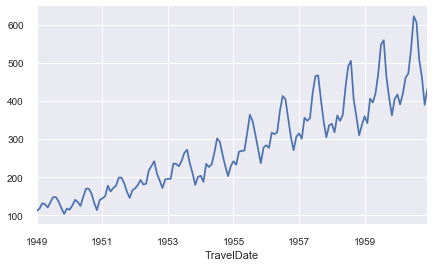

In [163]:
plt.figure(figsize=(7, 4))
ts.plot()
plt.show()

## Geospatial Data

Geospatial data is map-based (although what constitutes a **map** can go beyond the familiar). Ultimately, geographic data  occurs either in bitmap (raster) form or vector (resizeable polygons). It is not unusual for the two kinds of data to be used together.

Because borders are often complex, following river courses, mountain ranges, and so on, the files that describe their geometries can be large. To reduce file sizes and image rendering times, we prefer to work with polygons that are no more detailed than the maximum resolution we need for our task. For this reason, geospatial files are often available at several different resolutions.

There are several popular options for working with maps in Python. We will use `folium` for its breadth and its use of open-source data.

In [262]:
import folium

In [263]:
# Read SF Incidents data
crime_csv = 'data/SFPD_Incidents-Current_Year_2015.csv'

In [264]:
crime = pd.read_csv(crime_csv)
crime.head()

IncidntNum      Category                         Descript DayOfWeek  \
0   150827188  NON-CRIMINAL     AIDED CASE, MENTAL DISTURBED    Sunday   
1   150827213       ASSAULT      INFLICT INJURY ON COHABITEE    Sunday   
2   150827213       ASSAULT  ATTEMPTED HOMICIDE WITH A KNIFE    Sunday   
3   150827213       ASSAULT           CHILD ABUSE (PHYSICAL)    Sunday   
4   150827213       ASSAULT              MAYHEM WITH A KNIFE    Sunday   

         Date   Time PdDistrict      Resolution                   Address  \
0  09/20/2015  23:54   RICHMOND       UNFOUNDED  3000 Block of CLEMENT ST   
1  09/20/2015  23:45  INGLESIDE  ARREST, BOOKED     100 Block of LOEHR ST   
2  09/20/2015  23:45  INGLESIDE  ARREST, BOOKED     100 Block of LOEHR ST   
3  09/20/2015  23:45  INGLESIDE  ARREST, BOOKED     100 Block of LOEHR ST   
4  09/20/2015  23:45  INGLESIDE  ARREST, BOOKED     100 Block of LOEHR ST   

            X          Y                               Location  
0 -122.491851  37.781756  (37.7817557255921, -122.491851328976)  
1 -122.413676  37.712617  (37.7126165766239, -122.413676487435)  
2 -122.413676  37.712617  (37.7126165766239, -122.413676487435)  
3 -122.413676  37.712617  (37.7126165766239, -122.413676487435)  
4 -122.413676  37.712617  (37.7126165766239, -122.413676487435)

- Convert `Date` Column to DateTime and set as index 

In [266]:
crime['Date'] = pd.to_datetime(crime['Date'])

In [267]:
crime.set_index(keys=['Date'], inplace = True)

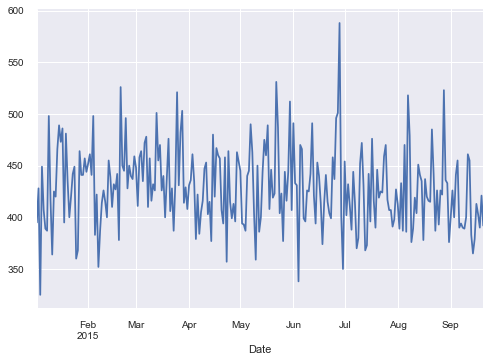

In [268]:
crime.groupby(crime.index).size().plot()
plt.show()

In [27]:
crime.groupby('Location').count().head()


NameError: name 'crime' is not defined

- Draw a timeseries plot to visualise number of crimes for each day.

In [269]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y')

crime = pd.read_csv(crime_csv,
                      parse_dates=['Date'],
                      index_col='Date',
                      date_parser=dateparse)
crime.head()

IncidntNum      Category                         Descript  \
Date                                                                    
2015-09-20   150827188  NON-CRIMINAL     AIDED CASE, MENTAL DISTURBED   
2015-09-20   150827213       ASSAULT      INFLICT INJURY ON COHABITEE   
2015-09-20   150827213       ASSAULT  ATTEMPTED HOMICIDE WITH A KNIFE   
2015-09-20   150827213       ASSAULT           CHILD ABUSE (PHYSICAL)   
2015-09-20   150827213       ASSAULT              MAYHEM WITH A KNIFE   

           DayOfWeek   Time PdDistrict      Resolution  \
Date                                                     
2015-09-20    Sunday  23:54   RICHMOND       UNFOUNDED   
2015-09-20    Sunday  23:45  INGLESIDE  ARREST, BOOKED   
2015-09-20    Sunday  23:45  INGLESIDE  ARREST, BOOKED   
2015-09-20    Sunday  23:45  INGLESIDE  ARREST, BOOKED   
2015-09-20    Sunday  23:45  INGLESIDE  ARREST, BOOKED   

                             Address           X          Y  \
Date                                                          
2015-09-20  3000 Block of CLEMENT ST -122.491851  37.781756   
2015-09-20     100 Block of LOEHR ST -122.413676  37.712617   
2015-09-20     100 Block of LOEHR ST -122.413676  37.712617   
2015-09-20     100 Block of LOEHR ST -122.413676  37.712617   
2015-09-20     100 Block of LOEHR ST -122.413676  37.712617   

                                         Location  
Date                                               
2015-09-20  (37.7817557255921, -122.491851328976)  
2015-09-20  (37.7126165766239, -122.413676487435)  
2015-09-20  (37.7126165766239, -122.413676487435)  
2015-09-20  (37.7126165766239, -122.413676487435)  
2015-09-20  (37.7126165766239, -122.413676487435)

In [270]:
ts = crime.groupby("Date").count()
ts.head()

IncidntNum  Category  Descript  DayOfWeek  Time  PdDistrict  \
Date                                                                      
2015-01-02         395       395       395        395   395         395   
2015-01-03         428       428       428        428   428         428   
2015-01-04         325       325       325        325   325         325   
2015-01-05         449       449       449        449   449         449   
2015-01-06         407       407       407        407   407         407   

            Resolution  Address    X    Y  Location  
Date                                                 
2015-01-02         395      395  395  395       395  
2015-01-03         428      428  428  428       428  
2015-01-04         325      325  325  325       325  
2015-01-05         449      449  449  449       449  
2015-01-06         407      407  407  407       407

In [271]:
ts1 = ts.IncidntNum

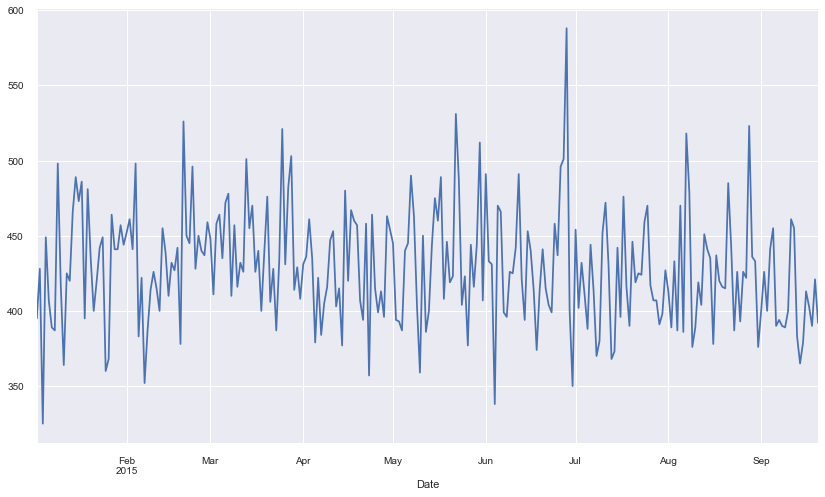

In [272]:
plt.figure(figsize=(14, 8))
ts1.plot()
plt.show()

- Using `folium` we can easily create a map. As it's SF data, by default we are using SF location.

In [279]:
def generateBaseMap(default_location=[37.76, -122.45], default_zoom_start=12):
    '''
    Create a base map
    '''
    base_map = folium.Map(
        location=default_location,
        control_scale=True,
        zoom_start=default_zoom_start)

    return base_map

In [285]:
base_map = generateBaseMap(default_location = [37.76, -122.45])
display(base_map)

- Add a marker in the map using `Folium.Marker` for first 100 rows of the dataset.

In [307]:
base_map = folium.Map (location = [37.76, -122.45], zoom_start=13)
for i in range(100):
    folium.Marker([crime.iloc[i]['Y'], crime.iloc[i]['X']], popup=crime.iloc[i]['PdDistrict']).add_to(base_map)
display(base_map)

- Add a cricle in the map using `Folium Circle` for first 100 rows of the dataset.

In [322]:
base_map = folium.Map (location = [37.76, -122.45], zoom_start=13)
for i in range(100):
    folium.Circle([crime.iloc[i]['Y'], crime.iloc[i]['X']], radius=25).add_to(base_map)
    
base_map

[BONUS] Create a heatmap of the incident happened in SF.

In [337]:
# insert code here
crime_loc = crime.groupby('PdDistrict').count()
crime_loc_trim = crime_loc [['IncidntNum', 'Location']]
crime_loc_trim.head()

IncidntNum  Location
PdDistrict                      
BAYVIEW          10399     10399
CENTRAL          13720     13720
INGLESIDE         9627      9627
MISSION          13161     13161
NORTHERN         14366     14366

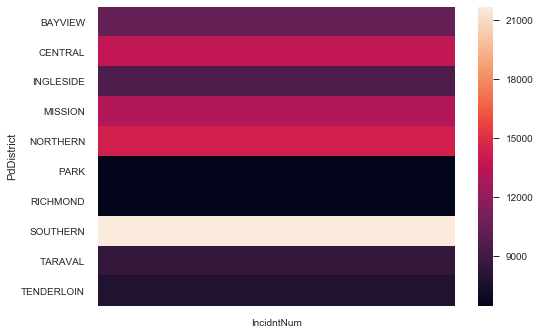

In [336]:
sns.heatmap(crime_loc_trim)

**HOMEWORK**
- Explore `Folium`
- Explore `GeoPandas`

In [343]:
from folium.plugins import HeatMap

base_map = generateBaseMap()
crime['count']=1

HeatMap (
    data = crime [['Y','X','count']].groupby(['Y','X']).sum().reset_index().values.tolist(), 
    radius=8, 
    max_zoom=13).add_to(base_map)

base_map

# More Resources
- [Histogram](https://en.wikipedia.org/wiki/Histogram)
- The [matplotlib users' guide](http://pageperso.lif.univ-mrs.fr/~francois.denis/IAAM1/Matplotlib.pdf) (pdf).
- [Visualisation ideas and code](https://python-graph-gallery.com)

# GeoPandas
The goal of GeoPandas is to make working with geospatial data in python easier. It combines the capabilities of pandas and shapely, providing geospatial operations in pandas and a high-level interface to multiple geometries to shapely. GeoPandas enables you to easily do operations in python that would otherwise require a spatial database such as PostGIS.
- [GeoPandas](http://geopandas.org/index.html)